In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [2]:
# 1 line import  boston's dataset
# 2 line instances it into boston variable
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
#check it's shape
boston.data.shape

(506, 13)

In [4]:
#Provide Dataset's description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#convert it into pandas dataframe format
df = pd.DataFrame(boston.data)
df.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94


In [6]:
#rename the columns with the dataset own names
df.columns = boston.feature_names
df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94


In [7]:
# if you have a look on the data description, you'll see that 
#the price isn't being provide by the dataframe above. Let's change it.
# boston.target é uma array com o preço das casas 
# boston.target gives the house's prices, than we include it inside our dataframe
df['PRICE'] = boston.target
df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#let's define our variables
# we don't want our model to take "Price" into account inside our X variable, so we drop it
X = df.drop('PRICE', axis = 1)
#Y is what we want to predict
Y = df.PRICE

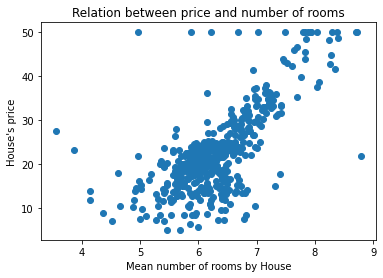

In [10]:
#Vizualing the data to see it's relation
plt.scatter(df.RM, Y)
plt.xlabel("Mean number of rooms by House")
plt.ylabel("House's price")
plt.title("Relation between price and number of rooms")
plt.show()

In [12]:
#use to split your data in train and test
from sklearn.model_selection import train_test_split
# Dividing X and Y in training and test
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.PRICE, test_size = 0.33, random_state = 5)

In [13]:
# Linear regression model
regr = LinearRegression()
# Treining the model
regr.fit(X_treino, Y_treino)

LinearRegression()

In [14]:
# Setting the data as train and test
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

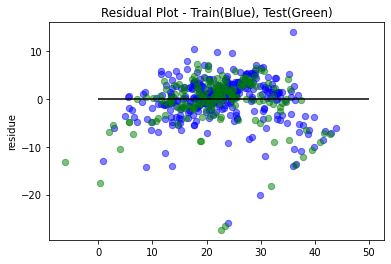

In [15]:
# Comparing the original prices vs predict ones
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("residue")
plt.title("Residual Plot - Train(Blue), Test(Green)")
plt.show()